In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start= '2010-01-01'
end= '2022-05-30'
df= data.DataReader('^NSEBANK', 'yahoo', start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,9129.450195,9031.900391,9031.900391,9112.349609,0.0,9112.349609
2010-01-05,9214.000000,9157.349609,9191.250000,9192.150391,0.0,9192.150391
2010-01-06,9265.549805,9183.650391,9243.900391,9223.000000,0.0,9223.000000
2010-01-07,9261.849609,9153.250000,9240.250000,9192.950195,0.0,9192.950195
2010-01-08,9214.349609,9141.450195,9185.049805,9160.700195,0.0,9160.700195
...,...,...,...,...,...,...
2022-05-24,34586.449219,34115.800781,34223.199219,34290.148438,163700.0,34290.148438
2022-05-25,34722.601562,34285.800781,34491.800781,34339.500000,153600.0,34339.500000
2022-05-26,35222.050781,34424.750000,34670.601562,35094.898438,191500.0,35094.898438


In [3]:
df=df.reset_index()

In [4]:
df=df.drop(["Date","Adj Close"], axis=1)

In [5]:
df

,High,Low,Open,Close,Volume
0,9129.450195,9031.900391,9031.900391,9112.349609,0.0
1,9214.000000,9157.349609,9191.250000,9192.150391,0.0
2,9265.549805,9183.650391,9243.900391,9223.000000,0.0
3,9261.849609,9153.250000,9240.250000,9192.950195,0.0
4,9214.349609,9141.450195,9185.049805,9160.700195,0.0
...,...,...,...,...,...
2766,34586.449219,34115.800781,34223.199219,34290.148438,163700.0
2767,34722.601562,34285.800781,34491.800781,34339.500000,153600.0
2768,35222.050781,34424.750000,34670.601562,35094.898438,191500.0
2769,35694.851562,35291.949219,35326.601562,35613.300781,132600.0


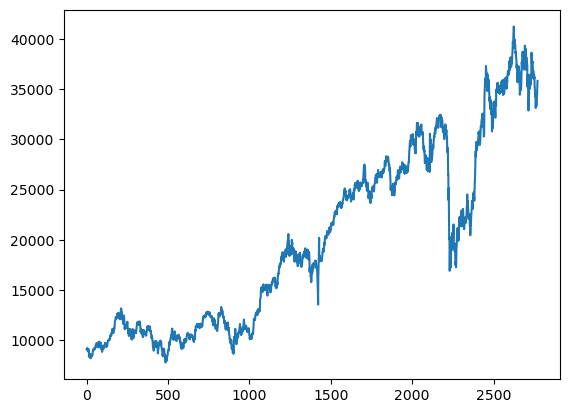

In [6]:
plt.plot(df.Close)

In [7]:
ma100=df.Close.rolling(100).mean()
ma100

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
2766    36460.505039
2767    36452.062031
2768    36452.557031
2769    36458.054023
2770    36461.506523
Name: Close, Length: 2771, dtype: float64

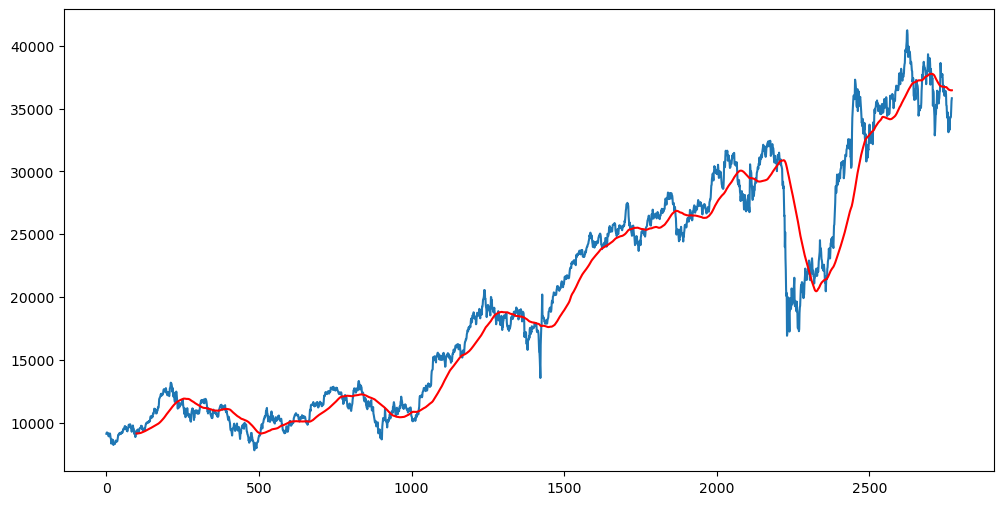

In [8]:
plt.figure(figsize=(12,6) )
plt.plot(df.Close)
plt.plot(ma100, 'r')


In [9]:
ma200=df.Close.rolling(200).mean()
ma200

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
2766    36861.064004
2767    36856.724258
2768    36852.058496
2769    36850.951250
2770    36851.039746
Name: Close, Length: 2771, dtype: float64

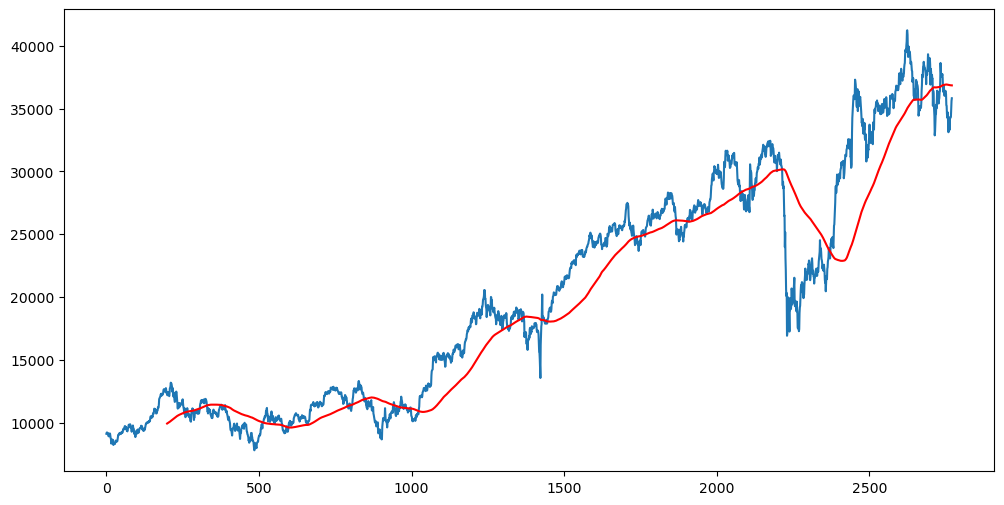

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'r')

In [11]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.06402081],
       [0.06790946],
       [0.06941275],
       ...,
       [0.94517931],
       [0.95051767],
       [0.96050474]])

In [15]:
x_train = []
y_train = []
for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train=np.array(x_train), np.array(y_train)     

In [16]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences = True,
             input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))
          
          

model.add(LSTM(units = 80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))
          
          

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units=1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
58/58 [==============================] - 32s 418ms/step - loss: 0.0335
Epoch 2/50
58/58 [==============================] - 25s 435ms/step - loss: 0.0088
Epoch 3/50
58/58 [==============================] - 28s 491ms/step - loss: 0.0062
Epoch 4/50
58/58 [==============================] - 30s 518ms/step - loss: 0.0064
Epoch 5/50
58/58 [==============================] - 27s 469ms/step - loss: 0.0057
Epoch 6/50
58/58 [==============================] - 28s 488ms/step - loss: 0.0063
Epoch 7/50
58/58 [==============================] - 29s 495ms/step - loss: 0.0052
Epoch 8/50
58/58 [==============================] - 28s 484ms/step - loss: 0.0061
Epoch 9/50
58/58 [==============================] - 29s 498ms/step - loss: 0.0054
Epoch 10/50
58/58 [==============================] - 30s 513ms/step - loss: 0.0050
Epoch 11/50
58/58 [==============================] - 27s 469ms/step - loss: 0.0052
Epoch 12/50
58/58 [==============================] - 29s 507ms/step - loss: 0.0047
Epoch 13/50
5

In [27]:
model.save("keras_model.h5")

In [19]:
 past_100_days= data_training.tail(100)

In [20]:
final_df= past_100_days.append(data_testing, ignore_index=True)

In [21]:
 input_data= scaler.fit_transform(final_df)

In [22]:
x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])
x_test, y_test= np.array(x_test), np.array(y_test)
    

In [23]:
from keras.models import load_model

In [24]:
model1 = load_model("keras_model.h5")

In [25]:
y_predicted= model1.predict(x_test)

26/26 [==============================] - 6s 151ms/step


In [26]:
scaler = scaler.scale_

In [27]:
y_predicted

array([[0.398629  ],
       [0.39971328],
       [0.40094447],
       [0.40232486],
       [0.4038052 ],
       [0.40533367],
       [0.40687206],
       [0.40839702],
       [0.40988457],
       [0.4113217 ],
       [0.41269505],
       [0.4139663 ],
       [0.4150964 ],
       [0.41604018],
       [0.41672358],
       [0.41707176],
       [0.4170534 ],
       [0.4167183 ],
       [0.4161346 ],
       [0.4153859 ],
       [0.41456306],
       [0.41376045],
       [0.41305804],
       [0.4125044 ],
       [0.41211396],
       [0.41185275],
       [0.41166922],
       [0.4114937 ],
       [0.41125023],
       [0.41087887],
       [0.41036594],
       [0.40973526],
       [0.40901428],
       [0.40825236],
       [0.40748933],
       [0.40674156],
       [0.4060111 ],
       [0.4053139 ],
       [0.40471822],
       [0.40431446],
       [0.404203  ],
       [0.4044654 ],
       [0.40516546],
       [0.40639234],
       [0.40829888],
       [0.4110216 ],
       [0.4147324 ],
       [0.419

In [28]:
scale_factor =1/scaler[0]
y_predicted=y_predicted * scale_factor
y_test= y_test * scale_factor


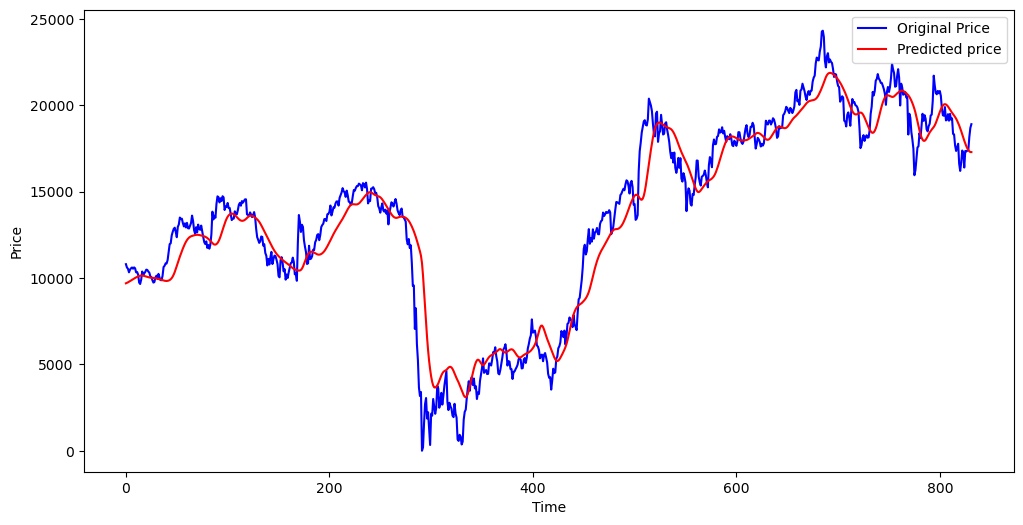

In [30]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
len(data_testing)
# plt.plot(data_testing)
data_testing

,Close
1939,27720.400391
1940,27528.550781
1941,27453.900391
1942,27248.250000
1943,27400.750000
...,...
2766,34290.148438
2767,34339.500000
2768,35094.898438
2769,35613.300781


In [47]:
# data_testing = scaler.fit_transform(data_testing)


x_input = data_testing[732:].values.reshape(1,-1)

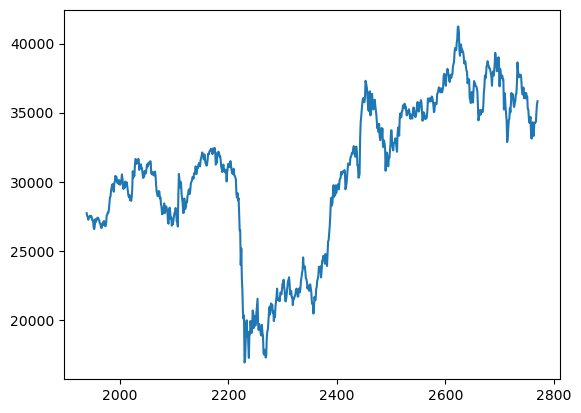

In [38]:
plt.plot(data_testing)

In [39]:

x_input.shape


(1, 100)

In [48]:
x_input

array([[36421.8984375 , 36840.1484375 , 37695.8984375 , 37490.25      ,
        37739.6015625 , 38347.8984375 , 38442.19921875, 38727.55078125,
        38469.94921875, 38370.3984375 , 38216.1484375 , 38210.30078125,
        38041.3515625 , 37850.8515625 , 37574.30078125, 36947.55078125,
        37706.75      , 37982.1015625 , 37689.3984375 , 37975.3515625 ,
        38505.5       , 39330.5       , 39010.        , 38789.3515625 ,
        37995.44921875, 38028.44921875, 38610.25      , 39010.94921875,
        38517.25      , 36908.55078125, 38170.1015625 , 37953.80078125,
        37531.6484375 , 37599.1484375 , 37685.6015625 , 37371.6484375 ,
        37392.05078125, 35228.1015625 , 36430.75      , 36205.30078125,
        35372.80078125, 34944.30078125, 34407.80078125, 32871.25      ,
        33158.1015625 , 33815.44921875, 34475.6015625 , 34546.25      ,
        35312.1484375 , 35022.6484375 , 35748.25      , 36428.55078125,
        36018.5       , 36348.55078125, 36147.3515625 , 35527.10

In [52]:
# plt.plot(x_input)
x_inp=x_input.transpose()

In [53]:
x_in = scaler.fit_transform(x_inp)

In [54]:
x_in

array([[0.5496998 ],
       [0.6144519 ],
       [0.74693632],
       [0.7150985 ],
       [0.7537023 ],
       [0.84787683],
       [0.86247617],
       [0.90665337],
       [0.86677234],
       [0.85136021],
       [0.82747973],
       [0.82657441],
       [0.80041825],
       [0.77092566],
       [0.72811097],
       [0.63107958],
       [0.74861633],
       [0.79124536],
       [0.74593001],
       [0.79020034],
       [0.87227619],
       [1.        ],
       [0.95038124],
       [0.91622117],
       [0.7933118 ],
       [0.79842075],
       [0.88849325],
       [0.95052819],
       [0.87409529],
       [0.62504173],
       [0.8203509 ],
       [0.78686392],
       [0.72150767],
       [0.7319578 ],
       [0.74534219],
       [0.696737  ],
       [0.69989562],
       [0.36488007],
       [0.55107017],
       [0.51616686],
       [0.38728193],
       [0.32094295],
       [0.23788378],
       [0.        ],
       [0.04440942],
       [0.14617784],
       [0.24838047],
       [0.259

In [60]:
temp_input=list(x_in)


In [61]:
temp_input 

[array([0.5496998]),
 array([0.6144519]),
 array([0.74693632]),
 array([0.7150985]),
 array([0.7537023]),
 array([0.84787683]),
 array([0.86247617]),
 array([0.90665337]),
 array([0.86677234]),
 array([0.85136021]),
 array([0.82747973]),
 array([0.82657441]),
 array([0.80041825]),
 array([0.77092566]),
 array([0.72811097]),
 array([0.63107958]),
 array([0.74861633]),
 array([0.79124536]),
 array([0.74593001]),
 array([0.79020034]),
 array([0.87227619]),
 array([1.]),
 array([0.95038124]),
 array([0.91622117]),
 array([0.7933118]),
 array([0.79842075]),
 array([0.88849325]),
 array([0.95052819]),
 array([0.87409529]),
 array([0.62504173]),
 array([0.8203509]),
 array([0.78686392]),
 array([0.72150767]),
 array([0.7319578]),
 array([0.74534219]),
 array([0.696737]),
 array([0.69989562]),
 array([0.36488007]),
 array([0.55107017]),
 array([0.51616686]),
 array([0.38728193]),
 array([0.32094295]),
 array([0.23788378]),
 array([0.]),
 array([0.04440942]),
 array([0.14617784]),
 array([0.248

In [62]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[-3916262.]
101
1 day input [array([0.6144519]) array([0.74693632]) array([0.7150985])
 array([0.7537023]) array([0.84787683]) array([0.86247617])
 array([0.90665337]) array([0.86677234]) array([0.85136021])
 array([0.82747973]) array([0.82657441]) array([0.80041825])
 array([0.77092566]) array([0.72811097]) array([0.63107958])
 array([0.74861633]) array([0.79124536]) array([0.74593001])
 array([0.79020034]) array([0.87227619]) array([1.]) array([0.95038124])
 array([0.91622117]) array([0.7933118]) array([0.79842075])
 array([0.88849325]) array([0.95052819]) array([0.87409529])
 array([0.62504173]) array([0.8203509]) array([0.78686392])
 array([0.72150767]) array([0.7319578]) array([0.74534219])
 array([0.696737]) array([0.69989562]) array([0.36488007])
 array([0.55107017]) array([0.51616686]) array([0.38728193])
 array([0.32094295]) array([0.23788378]) array([0.]) array([0.04440942])
 array([0.14617784]) array([0.24838047]) array([0.25931803])
 array([0.37789193]) array([0.33307248]) 

C:\Users\DELL\AppData\Local\Temp\ipykernel_9816\2095504953.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_input=np.array(temp_input[1:])


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [63]:
day_new=np.arange(1,101).reshape(-1,1)
day_pred=np.arange(101,131).reshape(-1,1)
df1=pd.DataFrame(df['Close'])
len(df1)




2771

In [64]:

# scaler=MinMaxScaler(feature_range=(0,1))
# df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1


,Close
0,9112.349609
1,9192.150391
2,9223.000000
3,9192.950195
4,9160.700195
...,...
2766,34290.148438
2767,34339.500000
2768,35094.898438
2769,35613.300781


In [65]:
scaler.inverse_transform(lst_output)

array([[-2.52960825e+10]])

In [66]:
flt_list = map(float, lst_output)

for i in lst_output:
    lst_output.append(i * int(scale_factor))

MemoryError: 

In [67]:
plt.figure(figsize = (15,6))
# plt.plot(df1)
# plt.plot(day_new,(df1[2671:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

<Figure size 1500x600 with 0 Axes>